<a href="https://colab.research.google.com/github/YeiferKmac/MetodosComputacionales2-G02/blob/main/Tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.typing import NDArray
from scipy.signal import find_peaks, peak_widths
import pandas as pd


In [41]:
def datos_prueba(t_max:float, dt:float, amplitudes:NDArray[float],
  frecuencias:NDArray[float], ruido:float=0.0) -> NDArray[float]:
  ts = np.arange(0.,t_max,dt)
  ys = np.zeros_like(ts,dtype=float)
  for A,f in zip(amplitudes,frecuencias):
    ys += A*np.sin(2*np.pi*f*ts)
    ys += np.random.normal(loc=0,size=len(ys),scale=ruido) if ruido else 0
  return ts,ys

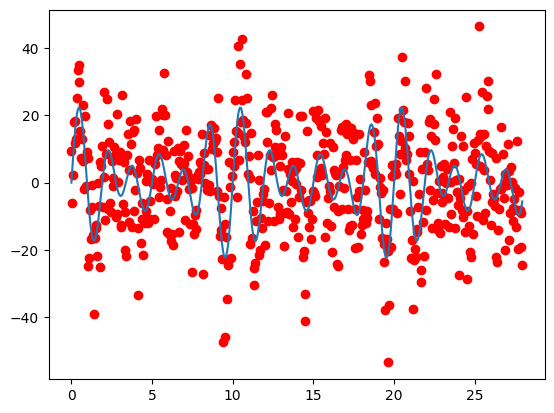

In [43]:
t1,y1 = datos_prueba(28,0.05,[7,10,6],[0.5,0.6,0.4],ruido=7)
t2,y2 = datos_prueba(28,0.05,[7,10,6],[0.5,0.6,0.4])
y2=y2
plt.scatter(t1,y1,color="r")
plt.plot(t2,y2)


In [44]:
def Fourier(t:NDArray[float], y:NDArray[float],
 f:NDArray[float]) -> NDArray[complex]:
    N = len(y)
    result = np.zeros(len(f), dtype=complex)
    for k in range(N):
        result += y[k]*np.exp(-2j * np.pi * t[k] * f)
    return result

In [54]:
# Definimos las frecuencias a analizar
frecuencias_analisis = np.array(np.linspace(0.1,10,1000))
# Transformada de Fourier de las señales
ft_sin_ruido = Fourier(t2, y2, frecuencias_analisis)
ft_con_ruido = Fourier(t1, y1, frecuencias_analisis)


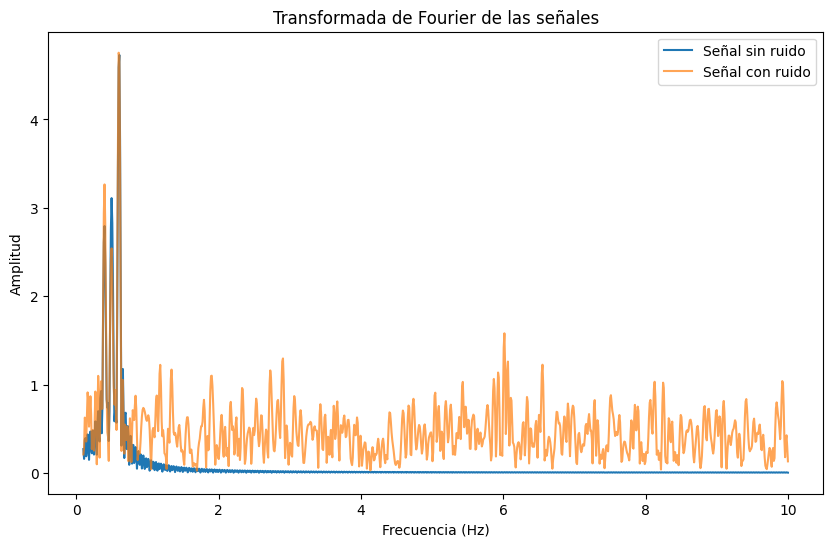

In [55]:
# Gráfico de las señales
plt.figure(figsize=(10, 6))
plt.plot(frecuencias_analisis, np.abs(ft_sin_ruido)/len(y1), label='Señal sin ruido')
plt.plot(frecuencias_analisis, np.abs(ft_con_ruido)/len(y1), label='Señal con ruido', alpha=0.7)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.legend()
plt.title('Transformada de Fourier de las señales')
plt.savefig("1.a.pdf")
plt.show()

In [10]:
print("1.a) Mantiene claro los picos, sin afectar mucho la señal")

1.a) Mantiene claro los picos, sin afectar mucho la señal


Text(0.5, 1.0, 'Transformada de Fourier de las señales')

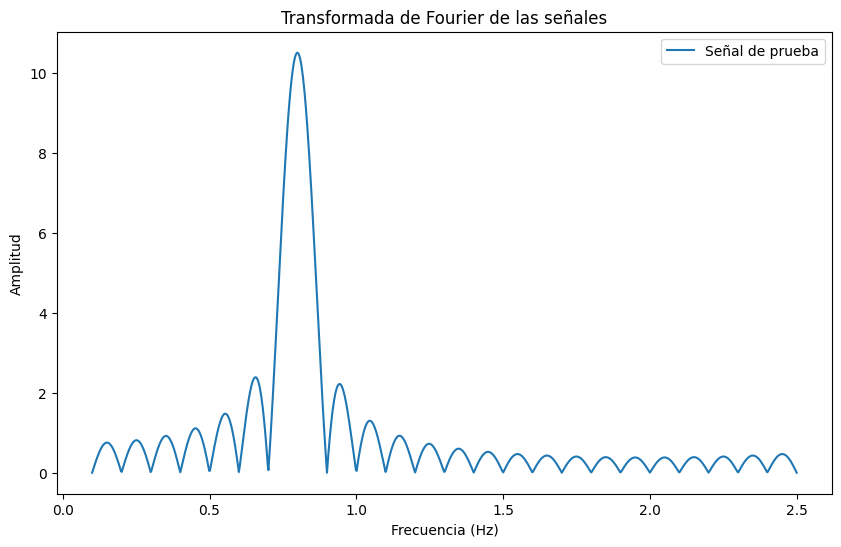

In [16]:
t3,y3 = datos_prueba(10,0.25,[21],[0.8])
frecuencias_analisis = np.array(np.linspace(0.1,2.5,1000))
ft_prueba = Fourier(t3, y3, frecuencias_analisis)
plt.figure(figsize=(10, 6))
plt.plot(frecuencias_analisis, np.abs(ft_prueba)/len(y3), label='Señal de prueba')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.legend()
plt.title('Transformada de Fourier de las señales')


In [12]:
len(frecuencias_analisis)


1000

In [34]:
# Encontramos los picos en la transformada sin ruido
peaks, properties = find_peaks(np.abs(ft_prueba)/len(y3), height=4 )

# Calculamos el FWHM
width = peak_widths(np.abs(ft_prueba)/len(y3),peaks,rel_height=0.5)

FWHM = np.diff(frecuencias_analisis)[0]*width[0]

# Mostramos el FWHM
print(f'FWHM del pico: {FWHM}')

FWHM del pico: [0.12078223]


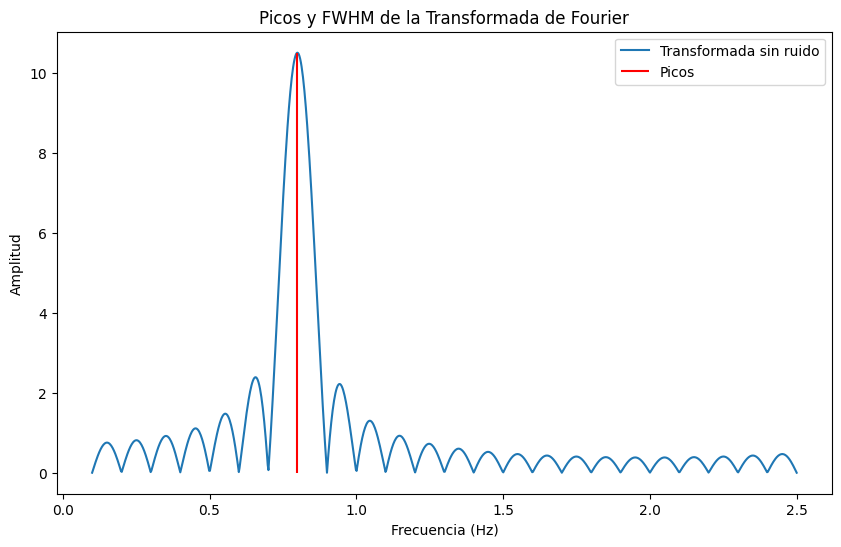

In [19]:
# Graficamos el FWHM
plt.figure(figsize=(10, 6))
plt.plot(frecuencias_analisis, np.abs(ft_prueba)/len(y3), label='Transformada sin ruido')
plt.vlines(frecuencias_analisis[peaks], 0, np.abs(ft_prueba)[peaks]/len(y3), color='r', label='Picos')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.legend()
plt.title('Picos y FWHM de la Transformada de Fourier')
plt.show()

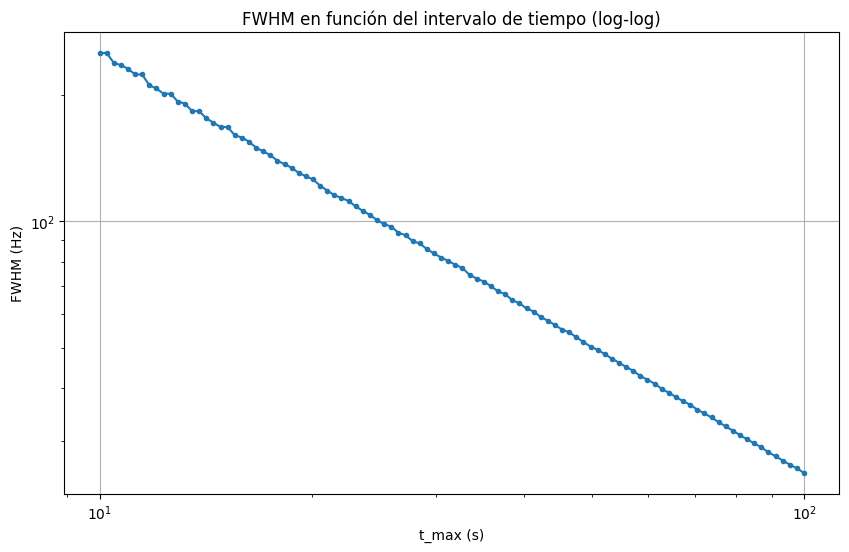

In [49]:
fwhm_values = []
t_max_values = np.logspace(1, 2, 100)  # valores de t_max entre 10 y 300 segundos
frecuencias_analisis = np.array(np.linspace(0.1,2.5,5000))

for t_max in t_max_values:
    t,y = datos_prueba(t_max,0.25,[21],[0.8])
    ft_prueba = Fourier(t, y, frecuencias_analisis)
    
    peaks, _ = find_peaks(np.abs(ft_prueba)/len(y), height=4)
    results_half = peak_widths(np.abs(ft_prueba)/len(y), peaks, rel_height=0.5)
    
    fwhm_values.append(results_half[0][0])

# Graficamos FWHM vs t_max
plt.figure(figsize=(10, 6))
plt.loglog(t_max_values, fwhm_values, ".-",label='FWHM vs t_max')
plt.xlabel('t_max (s)')
plt.ylabel('FWHM (Hz)')
plt.title('FWHM en función del intervalo de tiempo (log-log)')
plt.grid(True)
plt.show()


In [9]:
data = pd.read_csv("https://www.astrouw.edu.pl/ogle/ogle4/OCVS/lmc/cep/phot/I/OGLE-LMC-CEP-0001.dat", delimiter=" ")

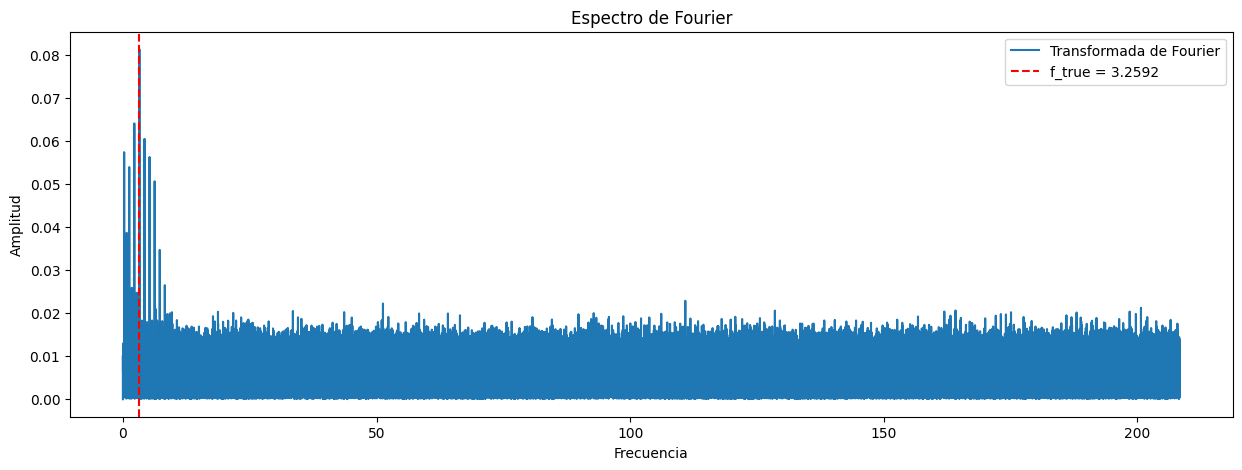

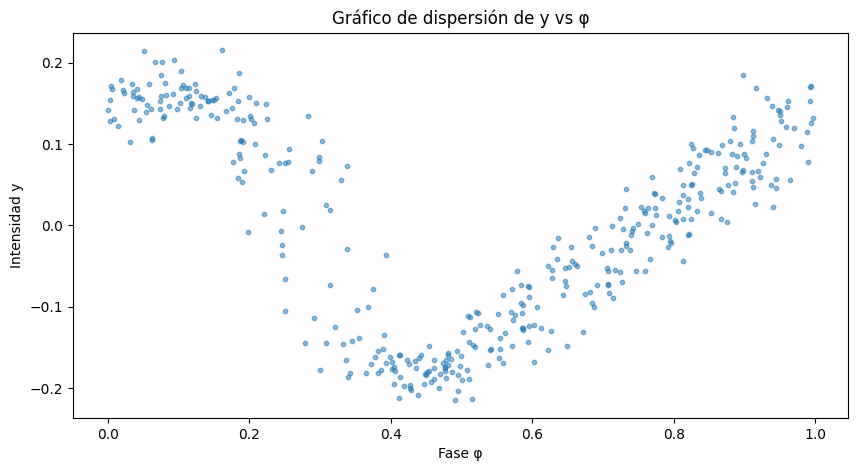

Frecuencia de Nyquist: 208.3333
Frecuencia de oscilación (f_true): 3.2592


In [83]:
t = data.iloc[:, 0].values  # Primera columna: tiempo
y = data.iloc[:, 1].values  # Segunda columna: intensidad
y -= np.mean(y) #Se resta la media para centrar la señal

# Determinar frecuencia de Nyquist
delta_t = np.min(np.diff(t))  # Paso de muestreo mínimo
f_nyquist = 1 / (2 * delta_t)

# Calcular la Transformada de Fourier
f = np.linspace(0, f_nyquist, 500000)  # Frecuencias hasta Nyquist
data_fourier = Fourier(t, y, f)
data_fourier = np.abs(data_fourier) / len(y)


# Encontrar la frecuencia de oscilación f_true
peaks, _ = find_peaks(data_fourier)
f_true = f[peaks[np.argmax(data_fourier[peaks])]]  # Pico más alto

# Calcular la fase phi
phi = np.mod(f_true * t, 1)

# Graficar resultados
plt.figure(figsize=(15, 5))
plt.plot(f, data_fourier, label="Transformada de Fourier")
plt.axvline(f_true, color='r', linestyle='--', label=f"f_true = {f_true:.4f}")
plt.xlabel("Frecuencia")
plt.ylabel("Amplitud")
plt.legend()
plt.title("Espectro de Fourier")
plt.show()

# Gráfico de dispersión de y vs phi
plt.figure(figsize=(10, 5))
plt.scatter(phi, y, alpha=0.5, s=10)
plt.xlabel("Fase φ")
plt.ylabel("Intensidad y")
plt.title("Gráfico de dispersión de y vs φ")
plt.show()

# Imprimir valores clave
print(f"Frecuencia de Nyquist: {f_nyquist:.4f}")
print(f"Frecuencia de oscilación (f_true): {f_true:.4f}")